In [5]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 2.0 MB/s eta 0:00:19
   ---------------------------------------- 0.3/38.6 MB 4.5 MB/s eta 0:00:09
    --------------------------------------- 0.6/38.6 MB 5.7 MB/s eta 0:00:07
    --------------------------------------- 1.0/38.6 MB 6.1 MB/s eta 0:00:07
   - -------------------------------------- 1.3/38.6 MB 6.6 MB/s eta 0:00:06
   - -------------------------------------- 1.8/38.6 MB 7.2 MB/s eta 0:00:06
   -- ------------------------------------- 2.1/38.6 MB 7.1 MB/s eta 0:00:06
   -- ------------------------------------- 2.5/38.6 MB 7.1 MB/s eta 0:00:06
   -- -----------------

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the training and testing datasets
train_dir = r'C:\Users\vutla\OneDrive\Desktop\forest_fire\Training and Validation'
test_dir = r'C:\Users\vutla\OneDrive\Desktop\forest_fire\Testing'

# Setup ImageDataGenerators
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(train_dir,
                                          target_size=(150, 150),
                                          batch_size=32,
                                          class_mode='binary')

test_dataset = test.flow_from_directory(test_dir,
                                        target_size=(150, 150),
                                        batch_size=32,
                                        class_mode='binary')


Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [4]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(150,150,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))


In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10


C:\Users\vutla\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 310ms/step - accuracy: 0.7470 - loss: 0.4455 - val_accuracy: 0.8529 - val_loss: 0.3098
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step - accuracy: 0.9387 - loss: 0.2047 - val_accuracy: 0.8824 - val_loss: 0.2448
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step - accuracy: 0.9549 - loss: 0.1283 - val_accuracy: 0.9265 - val_loss: 0.2033
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step - accuracy: 0.9659 - loss: 0.1107 - val_accuracy: 0.9265 - val_loss: 0.2365
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.9652 - loss: 0.1013 - val_accuracy: 0.8382 - val_loss: 0.4521
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 291ms/step - accuracy: 0.9686 - loss: 0.0901 - val_accuracy: 0.9265 - val_loss: 0.1435
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step - accuracy: 0.9756 - loss: 0.0678 - val_accuracy: 0.8971 - val_loss: 0.2528
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.9735 - loss: 0.0841 - val_accuracy: 0.985

In [7]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


In [8]:
predictions

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [9]:
print(len(predictions))

68


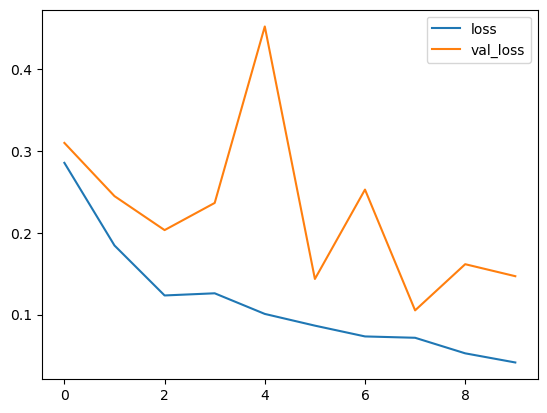

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

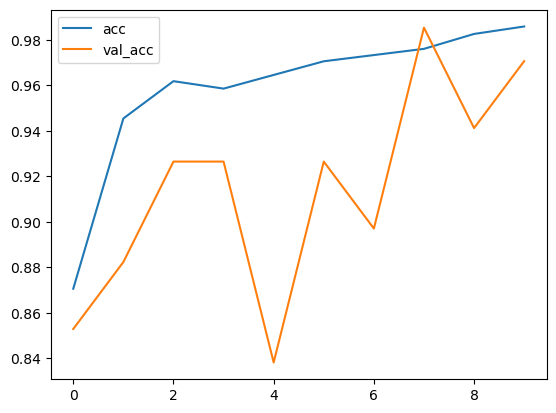

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [12]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[1.]]


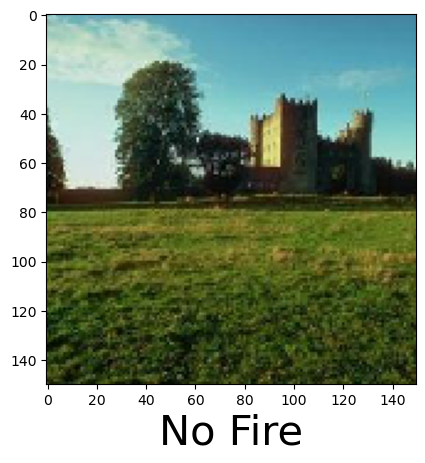

In [22]:
predictImage(r"C:\Users\vutla\OneDrive\Desktop\forest_fire\Testing\fire\abc183.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[1.]]


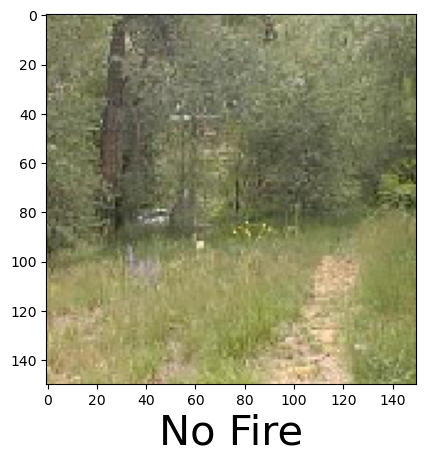

In [26]:
predictImage(r"C:\Users\vutla\OneDrive\Desktop\forest_fire\Training and Validation\nofire\abc205.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[0.]]


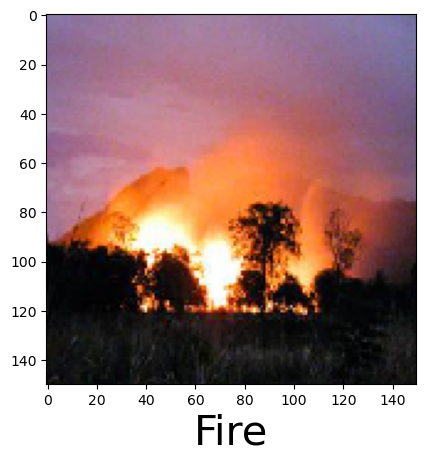

In [27]:
predictImage(r"C:\Users\vutla\OneDrive\Desktop\forest_fire\Testing\fire\abc183.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[1.]]


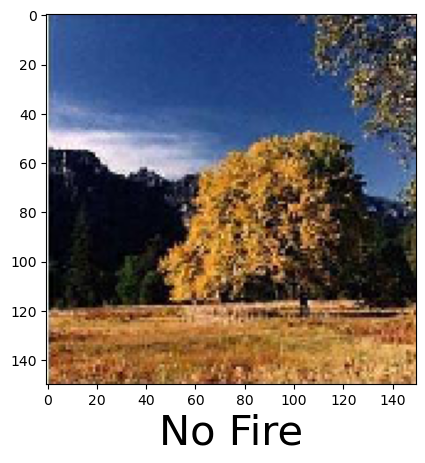

In [31]:
predictImage(r"C:\Users\vutla\OneDrive\Desktop\forest_fire\Testing\nofire\abc365.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[1.]]


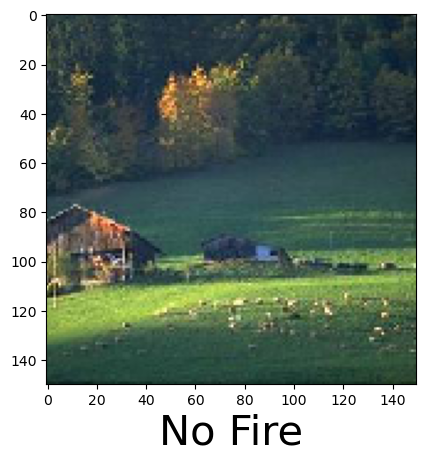

In [32]:
predictImage(r"C:\Users\vutla\OneDrive\Desktop\forest_fire\Testing\nofire\abc339.jpg")